In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from datetime import datetime
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
start = datetime(2011, 1, 1)
end = datetime(2021, 12, 31)

In [3]:
df = web.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864279
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078650
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131252
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214127
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205871


In [4]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-12-31,11.552857,11.475357,11.533929,11.520000,193508000.0,9.864279
1,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.078650
2,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.131252
3,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.214127
4,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.205871


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)

In [6]:
plt.figure(figsize=(15,6))
df['Close'].iplot()

<Figure size 1080x432 with 0 Axes>

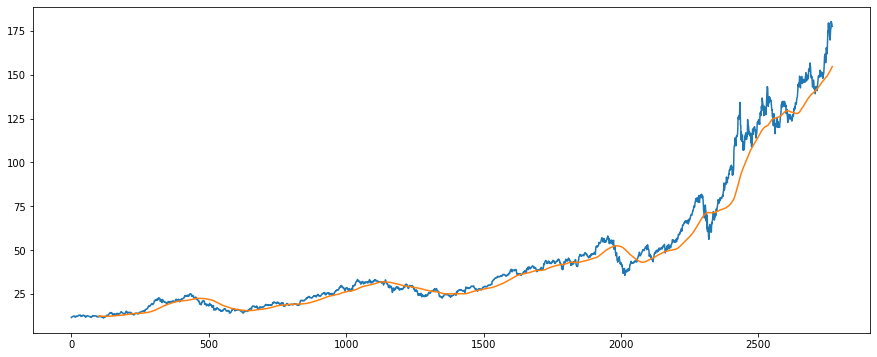

In [7]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.plot(df['Close'].rolling(100).mean())

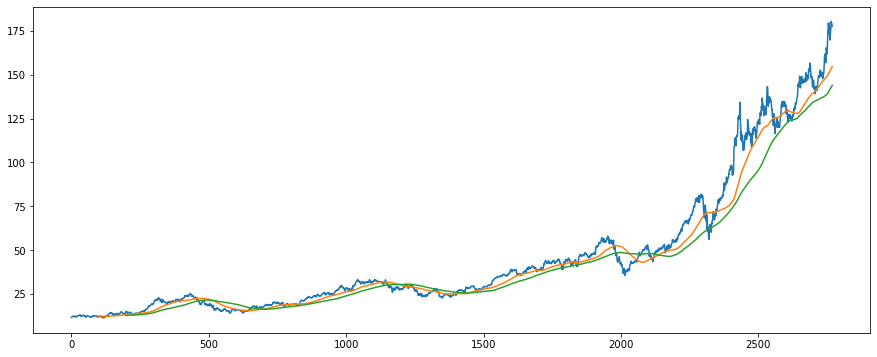

In [8]:
plt.figure(figsize=(15,6))
plt.plot(df['Close'])
plt.plot(df['Close'].rolling(100).mean())
plt.plot(df['Close'].rolling(200).mean())

In [9]:
df.shape

(2770, 5)

In [10]:
train_data = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
test_data = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(train_data.shape)
print(test_data.shape)

(1938, 1)
(832, 1)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [12]:
train_data_arr = scaler.fit_transform(train_data)
train_data_arr

array([[0.00564215],
       [0.01110504],
       [0.01244545],
       ...,
       [0.94528523],
       [0.97539747],
       [0.96023227]])

In [45]:
x_train = []
y_train = []

for i in range(100, train_data_arr.shape[0]):
    x_train.append(train_data_arr[i - 100 : i])
    y_train.append(train_data_arr[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

# Data Modeling

In [46]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [47]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
          
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [48]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_16 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_17 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_17 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_18 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_18 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_19 (LSTM)              (None, 120)              

In [49]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 15s 180ms/step - loss: 0.0326
Epoch 2/50
58/58 [==============================] - 10s 176ms/step - loss: 0.0072
Epoch 3/50
58/58 [==============================] - 10s 177ms/step - loss: 0.0055
Epoch 4/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0067
Epoch 5/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0050
Epoch 6/50
58/58 [==============================] - 11s 198ms/step - loss: 0.0042
Epoch 7/50
58/58 [==============================] - 13s 227ms/step - loss: 0.0045
Epoch 8/50
58/58 [==============================] - 11s 188ms/step - loss: 0.0039
Epoch 9/50
58/58 [==============================] - 10s 180ms/step - loss: 0.0040
Epoch 10/50
58/58 [==============================] - 10s 179ms/step - loss: 0.0043
Epoch 11/50
58/58 [==============================] - 10s 178ms/step - loss: 0.0033
Epoch 12/50
58/58 [==============================] - 10s 179ms/step - loss: 0.0036
Epoch 13/50
5

In [60]:
#model.save('Kerasfinalmodel.h5')

In [61]:
test_data.head()

,Close
1938,56.602501
1939,55.959999
1940,54.470001
1941,54.560001
1942,54.592499


In [62]:
past100_day = train_data.tail(100)

In [63]:
final_df = past100_day.append(test_data, ignore_index=True)

In [64]:
final_df.head()

,Close
0,41.310001
1,40.735001
2,40.912498
3,41.055000
4,40.580002


In [65]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03980109],
       [0.03582961],
       [0.03705557],
       [0.03803982],
       [0.03475904],
       [0.0398356 ],
       [0.04646626],
       [0.05936492],
       [0.05991746],
       [0.07190095],
       [0.0741975 ],
       [0.07573429],
       [0.0779963 ],
       [0.08262392],
       [0.08012017],
       [0.0793604 ],
       [0.07640771],
       [0.0794122 ],
       [0.07735742],
       [0.07618323],
       [0.07846252],
       [0.07765096],
       [0.07972303],
       [0.0793604 ],
       [0.08010291],
       [0.07892872],
       [0.07823804],
       [0.07715019],
       [0.08296929],
       [0.08571478],
       [0.08827033],
       [0.08942723],
       [0.08852935],
       [0.08549029],
       [0.08467873],
       [0.0864918 ],
       [0.08376357],
       [0.08393625],
       [0.08055185],
       [0.08037919],
       [0.07511267],
       [0.07651131],
       [0.07471553],
       [0.07378308],
       [0.06903458],
       [0.07293697],
       [0.07247078],
       [0.074

In [66]:
input_data.shape

(932, 1)

In [67]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100 : i])
    y_test.append(input_data[i, 0])
    
x_test, y_test = np.array(x_test), np.array(y_test)

In [68]:
print(x_test.shape)
print(y_test.shape)

(832, 100, 1)
(832,)


In [69]:
Y_pred = model.predict(x_test)
Y_pred.shape

(832, 1)

In [70]:
scaler.scale_

array([0.00690691])

In [71]:
scale_factor = 1/0.00690691
Y_pred = Y_pred*scale_factor
y_test = y_test*scale_factor

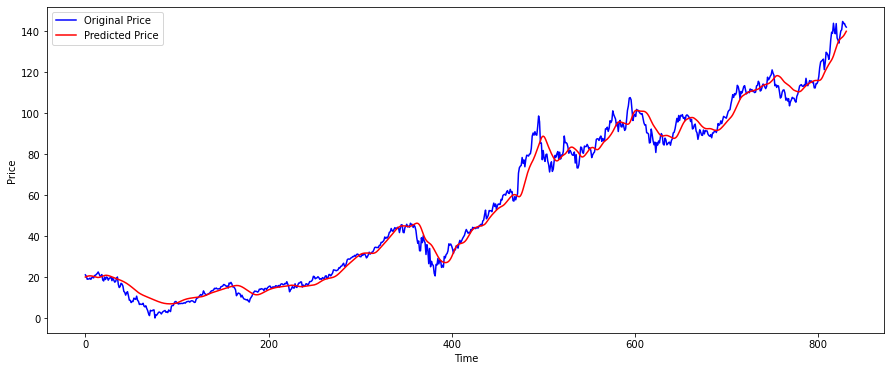

In [73]:
plt.figure(figsize=(15,6))
plt.plot(y_test, color='b', label='Original Price')
plt.plot(Y_pred, color='r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()